In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

In [2]:
original_Data = pd.read_csv("./산림청_산림통계_마이크로데이터(임분조사표)_20221118.csv", encoding = "cp949")
original_Data.head

C:\Users\sc.lee\AppData\Local\Temp\ipykernel_16096\2419354238.py:1: DtypeWarning: Columns (5,6,11,14,16,17,20,22,23,24,25,35,39,43,45,47,49,51,53,55,61,64,65,67) have mixed types. Specify dtype option on import or set low_memory=False.
  original_Data = pd.read_csv("./산림청_산림통계_마이크로데이터(임분조사표)_20221118.csv", encoding = "cp949")


<bound method NDFrame.head of          집락번호    표본점번호  조사차기  조사연도        조사일자 시도코드  시군구코드       읍면동코드  광역시도  \
0      100140  1001401     5  2006  2006-09-21   46  46910  46910340.0  전라남도   
1      100140  1001402     5  2006  2006-09-21   46  46910  46910340.0  전라남도   
2      100140  1001403     5  2006  2006-09-21   46  46910  46910340.0  전라남도   
3      100140  1001404     5  2006  2006-09-21   46  46910  46910340.0  전라남도   
4      112108  1121081     5  2006  2006-09-22   46  46900  46900360.0  전라남도   
...       ...      ...   ...   ...         ...  ...    ...         ...   ...   
47067  428278  4282784     7  2020  2020-08-11   47  47111  47111250.0  경상북도   
47068  428284  4282841     7  2020  2020-06-03   47  47111  47111320.0  경상북도   
47069  428284  4282842     7  2020  2020-06-03   47  47111  47111320.0  경상북도   
47070  428284  4282843     7  2020  2020-06-03   47  47111  47111320.0  경상북도   
47071  428284  4282844     7  2020  2020-06-03   47  47111  47111320.0  경상북도   

         

In [3]:
col_list = original_Data.columns

li = []
for i in col_list:
    li.append(sum(original_Data.value_counts(i)))

drop_list = []

for i in range(0,len(li)):
    if li[i]<30000:
        drop_list.append(i)

In [ ]:
original_Data.drop(columns = col_list[drop_list], inplace=True)
original_Data.drop(columns= ["조사차기", "조사연도","조사일자", "입력자 ", "갱신형태", "갱신형태코드", "임종", "임종코드"], inplace=True)
print(original_Data.columns)
original_Data.drop(30470, inplace = True)

Index(['집락번호', '표본점번호', '시도코드', '시군구코드', '읍면동코드', '광역시도', '시군구', '읍면동', '좌표N',
       '좌표E', '도로로부터의거리', '해발고', '경사', '지형코드', '지형', '임상코드', '임상', '수관밀도코드',
       '수관밀도', '경급코드', '경급', '영급코드', '영급'],
      dtype='object')


In [40]:
좌표N_clean = original_Data['좌표N'].str.replace(r'[xX]{2}$', '50', regex=True)
좌표E_clean = original_Data['좌표E'].str.replace(r'[xX]{2}$', '50', regex=True)

In [41]:
original_Data['좌표N_num'] = pd.to_numeric(좌표N_clean, errors='coerce')
original_Data['좌표E_num'] = pd.to_numeric(좌표E_clean, errors='coerce')

In [49]:
original_Data = original_Data.dropna(subset=['좌표N_num', '좌표E_num'])
original_Data['좌표N_num'] = original_Data['좌표N_num'].astype(int)
original_Data['좌표E_num'] = original_Data['좌표E_num'].astype(int)

cleanData = original_Data[
    (original_Data['좌표E_num'] >= 1600000) & (original_Data['좌표E_num'] <= 2200000) &
    (original_Data['좌표N_num'] >= 1300000) & (original_Data['좌표N_num'] <= 2200000)
]

In [51]:
cleanData['geometry'] = [Point(xy) for xy in zip(cleanData['좌표E_num'], cleanData['좌표N_num'])]
gdf = gpd.GeoDataFrame(cleanData, geometry='geometry')
gdf.set_crs(epsg=5179, inplace=True)

C:\Users\sc.lee\AppData\Local\Temp\ipykernel_16096\1724930652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['geometry'] = [Point(xy) for xy in zip(cleanData['좌표E_num'], cleanData['좌표N_num'])]


,집락번호,표본점번호,시도코드,시군구코드,읍면동코드,광역시도,시군구,읍면동,좌표N,좌표E,...,임상,수관밀도코드,수관밀도,경급코드,경급,영급코드,영급,좌표N_num,좌표E_num,geometry
30699,164132,1641321,46,46830,46830390.0,전라남도,영암군,미암면,13169xx,16392xx,...,혼효림(M),3.0,51-75%,2.0,중경목,4.0,4영급,1316950,1639250,POINT (1639250 1316950)
30700,164132,1641322,46,46830,46830390.0,전라남도,영암군,미암면,13174xx,16392xx,...,활엽수림(H),3.0,51-75%,1.0,소경목,4.0,4영급,1317450,1639250,POINT (1639250 1317450)
30701,164132,1641323,46,46830,46830390.0,전라남도,영암군,미암면,13166xx,16396xx,...,활엽수림(H),4.0,76-100%,1.0,소경목,4.0,4영급,1316650,1639650,POINT (1639650 1316650)
30702,164132,1641324,46,46830,46830390.0,전라남도,영암군,미암면,13166xx,16387xx,...,활엽수림(H),3.0,51-75%,1.0,소경목,4.0,4영급,1316650,1638750,POINT (1638750 1316650)
30706,164220,1642204,45,45790,45790320.0,전라북도,고창군,아산면,21966xx,16387xx,...,침엽수림(D),4.0,76-100%,1.0,소경목,5.0,5영급,2196650,1638750,POINT (1638750 2196650)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44274,220152,2201524,46,46780,46780340.0,전라남도,보성군,율어면,15166xx,21988xx,...,혼효림(M),2.0,26-50%,1.0,소경목,2.0,2영급,1516650,2198850,POINT (2198850 1516650)
44275,220156,2201561,46,46780,46780360.0,전라남도,보성군,문덕면,15569xx,21992xx,...,활엽수림(H),2.0,26-50%,2.0,중경목,4.0,4영급,1556950,2199250,POINT (2199250 1556950)
44276,220156,2201562,46,46780,46780360.0,전라남도,보성군,문덕면,15574xx,21992xx,...,침엽수림(D),4.0,76-100%,3.0,대경목,5.0,5영급,1557450,2199250,POINT (2199250 1557450)
44277,220156,2201563,46,46780,46780360.0,전라남도,보성군,문덕면,15566xx,21996xx,...,활엽수림(H),1.0,0-25%,0.0,치수,1.0,1영급,1556650,2199650,POINT (2199650 1556650)


In [52]:
original_Data

,집락번호,표본점번호,시도코드,시군구코드,읍면동코드,광역시도,시군구,읍면동,좌표N,좌표E,...,임상,수관밀도코드,수관밀도,경급코드,경급,영급코드,영급,좌표N_num,좌표E_num,geometry
0,100140,1001401,46,46910,46910340.0,전라남도,신안군,비금면,1396XX,999XX,...,활엽수림(H),1.0,0-25%,0.0,치수,0.0,기타,139650,99950,POINT (99950 139650)
1,100140,1001402,46,46910,46910340.0,전라남도,신안군,비금면,1397XX,999XX,...,활엽수림(H),1.0,0-25%,0.0,치수,0.0,기타,139750,99950,POINT (99950 139750)
2,100140,1001403,46,46910,46910340.0,전라남도,신안군,비금면,1396XX,999XX,...,혼효림(M),1.0,0-25%,1.0,소경목,3.0,3영급,139650,99950,POINT (99950 139650)
3,100140,1001404,46,46910,46910340.0,전라남도,신안군,비금면,1396XX,998XX,...,침엽수림(D),1.0,0-25%,0.0,치수,0.0,기타,139650,99850,POINT (99850 139650)
4,112108,1121081,46,46900,46900360.0,전라남도,진도군,조도면,1076XX,1119XX,...,침엽수림(D),1.0,0-25%,0.0,치수,1.0,1영급,107650,111950,POINT (111950 107650)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47067,428278,4282784,47,47111,47111250.0,경상북도,포항시남구,구룡포읍,27766xx,42788xx,...,침엽수림(D),4.0,76-100%,3.0,대경목,4.0,4영급,2776650,4278850,POINT (4278850 2776650)
47068,428284,4282841,47,47111,47111320.0,경상북도,포항시남구,동해면,28368xx,42793xx,...,활엽수림(H),4.0,76-100%,1.0,소경목,5.0,5영급,2836850,4279350,POINT (4279350 2836850)
47069,428284,4282842,47,47111,47111320.0,경상북도,포항시남구,동해면,28373xx,4279xx,...,활엽수림(H),4.0,76-100%,1.0,소경목,4.0,4영급,2837350,427950,POINT (427950 2837350)
47070,428284,4282843,47,47111,47111320.0,경상북도,포항시남구,동해면,28366xx,42797xx,...,활엽수림(H),4.0,76-100%,1.0,소경목,4.0,4영급,2836650,4279750,POINT (4279750 2836650)


In [45]:
gdf.to_file("Microdata.gpkg", driver="GPKG")

<Axes: >

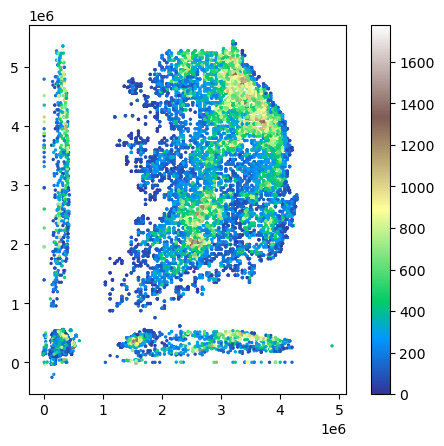

In [46]:
gdf.plot(column='해발고', cmap='terrain', legend=True, markersize=2)